### Import Library dan Data

In [464]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

df = pd.read_excel('data/DATA RUMAh.xlsx', usecols=['HARGA', 'LB','LT','KT','KM','GRS'])
df['HARGA'] = df['HARGA'].div(1000000)
df.head()

,HARGA,LB,LT,KT,KM,GRS
0,3800.0,220,220,3,3,0
1,4600.0,180,137,4,3,2
2,3000.0,267,250,4,4,4
3,430.0,40,25,2,2,0
4,9000.0,400,355,6,5,3


### Check shape dan null

In [465]:
print(df.isnull().sum())
print('\n')
print(df.shape)
print('\n')
print(df.describe())

HARGA    0
LB       0
LT       0
KT       0
KM       0
GRS      0
dtype: int64


(1010, 6)


              HARGA           LB           LT           KT           KM  \
count   1010.000000  1010.000000  1010.000000  1010.000000  1010.000000   
mean    7628.987019   276.539604   237.432673     4.668317     3.607921   
std     7340.945790   177.864557   179.957604     1.572776     1.420066   
min      430.000000    40.000000    25.000000     2.000000     1.000000   
25%     3262.500000   150.000000   130.000000     4.000000     3.000000   
50%     5000.000000   216.500000   165.000000     4.000000     3.000000   
75%     9000.000000   350.000000   290.000000     5.000000     4.000000   
max    65000.000000  1126.000000  1400.000000    10.000000    10.000000   

               GRS  
count  1010.000000  
mean      1.920792  
std       1.510998  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       2.000000  
max      10.000000  


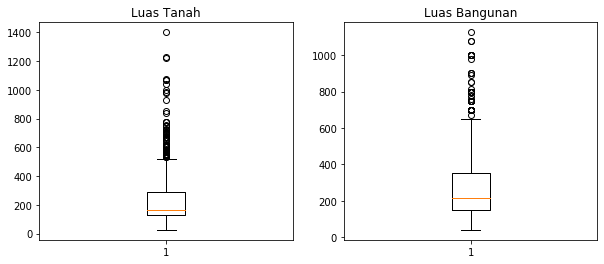

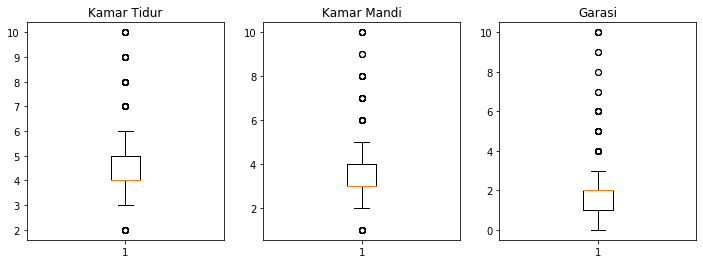

In [466]:
f = plt.figure(figsize=(10,4))
f.add_subplot(1,2,1)
plt.boxplot(df['LT'])
plt.title('Luas Tanah')

f.add_subplot(1,2,2)
plt.boxplot(df['LB'])
plt.title('Luas Bangunan')
plt.show()

f = plt.figure(figsize=(12,4))
f.add_subplot(1,3,1)
plt.boxplot(df['KT'])
plt.title('Kamar Tidur')

f.add_subplot(1,3,2)
plt.boxplot(df['KM'])
plt.title('Kamar Mandi')

f.add_subplot(1,3,3)
plt.boxplot(df['GRS'])
plt.title('Garasi')
plt.show()

### Check Linearity

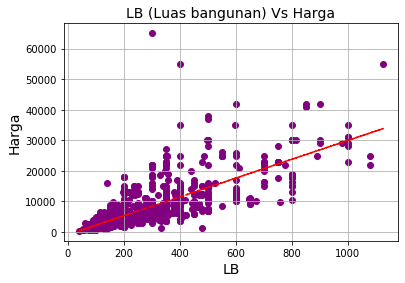

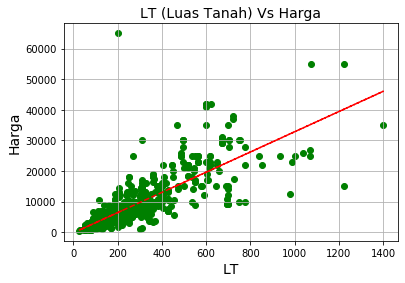

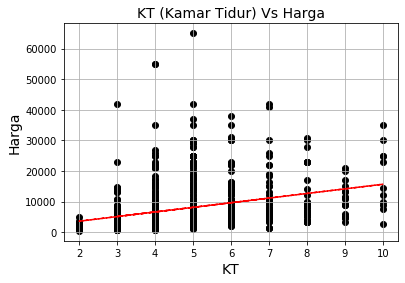

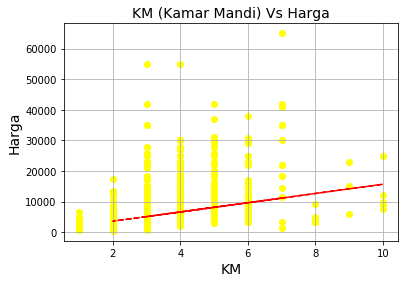

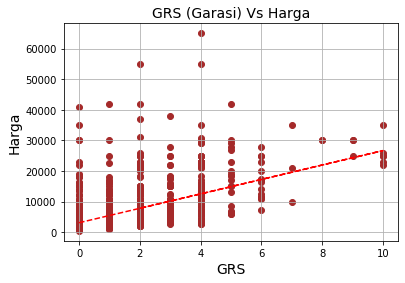

In [467]:
#luas bangunan
plt.scatter(df['LB'], df['HARGA'], color='purple')
plt.title('LB (Luas bangunan) Vs Harga', fontsize=14)
plt.xlabel('LB', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['LB'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['LB'],p(df['LB']),"r--")

plt.show()

#luas tanah
plt.scatter(df['LT'], df['HARGA'], color='green')
plt.title('LT (Luas Tanah) Vs Harga', fontsize=14)
plt.xlabel('LT', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['LT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['LT'],p(df['LT']),"r--")

plt.show()

#kamar tidur
plt.scatter(df['KT'], df['HARGA'], color='black')
plt.title('KT (Kamar Tidur) Vs Harga', fontsize=14)
plt.xlabel('KT', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['KT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['KT'],p(df['KT']),"r--")

plt.show()

#kamar mandi
plt.scatter(df['KM'], df['HARGA'], color='yellow')
plt.title('KM (Kamar Mandi) Vs Harga', fontsize=14)
plt.xlabel('KM', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['KT'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['KT'],p(df['KT']),"r--")

plt.show()

#garasi
plt.scatter(df['GRS'], df['HARGA'], color='brown')
plt.title('GRS (Garasi) Vs Harga', fontsize=14)
plt.xlabel('GRS', fontsize=14)
plt.ylabel('Harga', fontsize=14)
plt.grid(True)

z = np.polyfit(df['GRS'], df['HARGA'], 1)
p = np.poly1d(z)
plt.plot(df['GRS'],p(df['GRS']),"r--")

plt.show()

### Pengecekan Korelasi antar Kolom

In [468]:
df.corr().style.background_gradient().set_precision(2)

,HARGA,LB,LT,KT,KM,GRS
HARGA,1,0.75,0.81,0.32,0.4,0.48
LB,0.75,1,0.74,0.44,0.53,0.49
LT,0.81,0.74,1,0.43,0.39,0.48
KT,0.32,0.44,0.43,1,0.67,0.28
KM,0.4,0.53,0.39,0.67,1,0.35
GRS,0.48,0.49,0.48,0.28,0.35,1


### Menentukan Variable Target dan Predictors

In [469]:
#split predictor and target

target = 'HARGA'
predictor = ['LB','LT','KM','KT','GRS']
y = df[target]
X = df[predictor]

print(X.head())
print(y.head())

    LB   LT  KM  KT  GRS
0  220  220   3   3    0
1  180  137   3   4    2
2  267  250   4   4    4
3   40   25   2   2    0
4  400  355   5   6    3
0    3800.0
1    4600.0
2    3000.0
3     430.0
4    9000.0
Name: HARGA, dtype: float64


### Melakukan Splitting Data Train dan Testing

In [470]:
#split data to training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(808, 5)
(808,)
(202, 5)
(202,)


### Pembuatan Model MLR

In [471]:
from sklearn import linear_model

regresiModel = linear_model.LinearRegression()
regresiModel.fit(X_train, y_train)

#y-intercept
print('Nilai Intercept : ',regresiModel.intercept_)
coefisien = pd.DataFrame({
    'Predictor': predictor,
    'Coefisien': regresiModel.coef_.round(2)
})
coefisien

Nilai Intercept :  -1282.7383797981183


,Predictor,Coefisien
0,LB,11.53
1,LT,23.57
2,KM,445.93
3,KT,-485.05
4,GRS,457.52


### Percobaan prediksi

In [472]:
y_pred = regresiModel.predict(X_test)
column_values = [
    'Data fix',
    'Data predict'
]

df = pd.DataFrame(columns = column_values) 
df['Data fix'] = y_test
df['Data predict'] = y_pred.round(1)
print(df)
print('score : ',regresiModel.score(X_test, y_test))

      Data fix  Data predict
249     5000.0        8785.1
596     2650.0        6334.0
539     5100.0        8049.2
904    25000.0       28243.0
479     5990.0        8655.3
124     4000.0        4965.0
494     2900.0        4672.1
474    55000.0       41298.8
992     3000.0        3495.1
662     4850.0        7817.6
637    25000.0       16328.0
779     7500.0        9819.7
146    13000.0       11053.8
965     4000.0        4516.5
733     5500.0        9032.5
893     8000.0        6656.3
330     2700.0        3022.5
931     2100.0        5199.8
315     1500.0        2525.2
807    25000.0       17205.5
966     3500.0        2573.0
216     2500.0        4176.7
939     6800.0        8522.7
44      3500.0        3537.3
116     4000.0        3911.4
908     1600.0        1379.7
887     6800.0        8222.6
48      4300.0        3936.7
842     9500.0       12412.0
809     5500.0       12121.8
...        ...           ...
1002    7000.0        2893.5
97      2600.0        3098.2
880    10500.0

In [473]:
from sklearn import metrics

##data testing
print(metrics.mean_absolute_error(y_test, y_pred).round(2))
print(metrics.mean_squared_error(y_test, y_pred).round(2))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)).round(2))

2341.61
13871314.72
3724.42


In [474]:
##data training
y_train_pred = regresiModel.predict(X_train)
print(metrics.mean_absolute_error(y_train, y_train_pred).round(2))
print(metrics.mean_squared_error(y_train, y_train_pred).round(2))
print(np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)).round(2))

2029.4
15735305.03
3966.78


In [475]:
df.describe()

,Data fix,Data predict
count,202.000000,202.000000
mean,8042.888889,8514.291089
std,7805.205041,7145.993356
min,700.000000,1074.000000
25%,3312.500000,3936.550000
50%,5200.000000,5853.300000
75%,9650.000000,10640.525000
max,55000.000000,44709.100000
